#   Importer les packages

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# **1. Chargement et exploration des données**

In [31]:
data = pd.read_csv('../data/Mall_Customers.csv')
print("Aperçu des données :")
print(data.head())

Aperçu des données :
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# **2. Prétraitement des données : Encodage de la colonne 'Genre'**

In [32]:
# Remplacement des valeurs de 'Genre' par des valeurs numériques : Male = 1, Female = 0
data['Genre'] = np.where(data['Genre'] == 'Male', 1, 0)

In [33]:
# Vérification après encodage
print("\nDonnées après encodage :")
print(data.head())


Données après encodage :
   CustomerID  Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1      1   19                  15                      39
1           2      1   21                  15                      81
2           3      0   20                  16                       6
3           4      0   23                  16                      77
4           5      0   31                  17                      40


# **3. Extraction des variables indépendantes (Revenu annuel et Score de dépenses)**

In [34]:
X = data.iloc[:, 3:5].values  # Sélection des colonnes 'Annual Income (k$)' et 'Spending Score (1-100)'

# **4. Détermination du nombre optimal de clusters avec la méthode du coude**

In [35]:
wcss_list = []  # Liste pour stocker les valeurs de WCSS
for i in range(1, 11):  # Tester entre 1 et 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss_list.append(kmeans.inertia_)

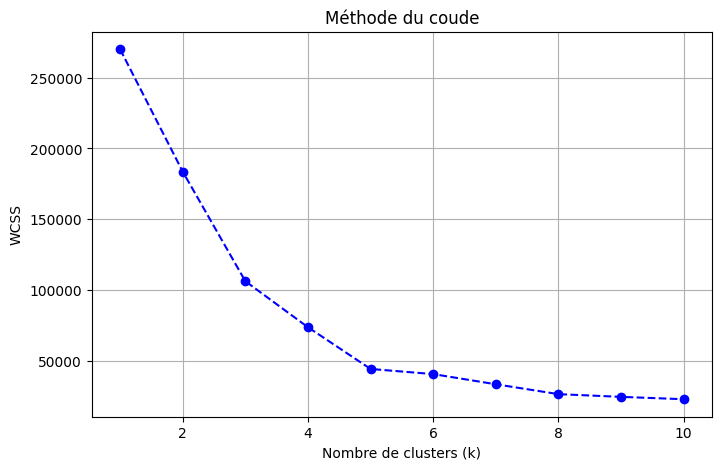

In [36]:
# Visualisation de la méthode du coude
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss_list, marker='o', linestyle='--', color='b')
plt.title('Méthode du coude')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# **5. Entraînement de l'algorithme K-Means avec le nombre optimal de clusters**

In [37]:
# D'après le graphique du coude, supposons que le nombre optimal de clusters est 5
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
y_predict = kmeans.fit_predict(X)  # Prédictions de clusters

In [38]:
# Affichage des clusters attribués
print("\nClusters attribués :")
print(y_predict)


Clusters attribués :
[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [39]:
# **6. Visualisation des clusters**
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

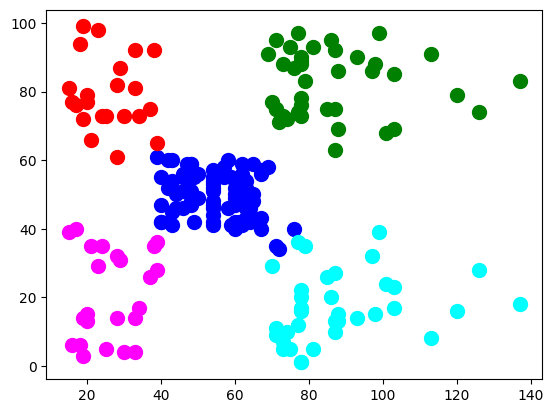

In [40]:
# Visualisation des groupes de clusters
colors = ['blue', 'green', 'red', 'cyan', 'magenta']
labels = [f"Groupe {i+1}" for i in range(optimal_clusters)]
for i in range(optimal_clusters):
    plt.scatter(X[y_predict == i, 0], X[y_predict == i, 1], s=100, c=colors[i], label=labels[i])
